In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#loading dataset with first column as index
df = pd.read_csv("attrition.csv", index_col = 0)

In [3]:
#checking dataset
df
#Three colums are catrgorical which we will need to convert to numeric (encoding)
#EmpId is not useful so we will drop it later.

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
1,2001,0.58,0.74,4,215,3,0,0,sales,low,exist
2,2002,0.82,0.67,2,202,3,0,0,sales,low,exist
3,2003,0.45,0.69,5,193,3,0,0,sales,low,exist
4,2004,0.78,0.82,5,247,3,0,0,sales,low,exist
5,2005,0.49,0.60,3,214,2,0,0,sales,low,exist
...,...,...,...,...,...,...,...,...,...,...,...
15000,14995,0.40,0.57,2,151,3,0,0,support,low,left
15001,14996,0.37,0.48,2,160,3,0,0,support,low,left
15002,14997,0.37,0.53,2,143,3,0,0,support,low,left
15003,14998,0.11,0.96,6,280,4,0,0,support,low,left


In [4]:
#Checking for null values.
df.isnull().sum()
# data is pretty much clean. No null or missing values.

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
status                   0
dtype: int64

<AxesSubplot:>

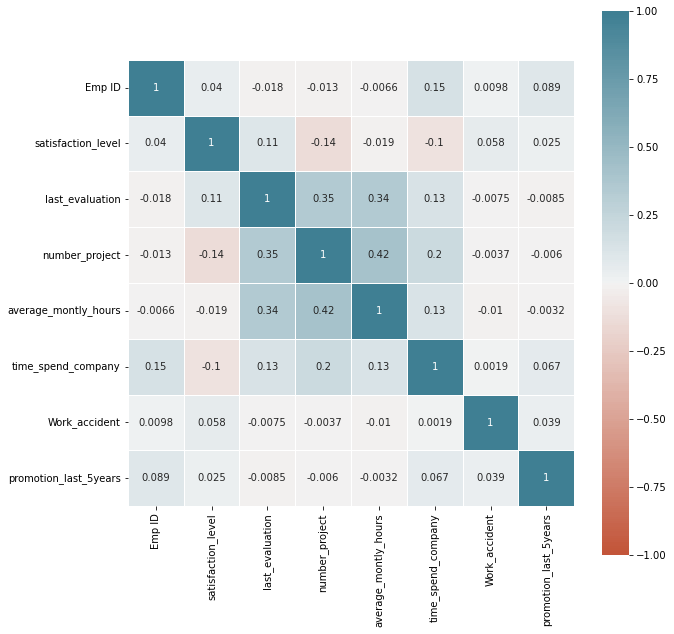

In [5]:
# checking correlation to identify relation between variables. 
# As a thumb rule we would drop one of the two variables if,
# between independent and dependent > 0.6
# between independent < 0.1
# our dependent variable would be Status
# As onserved there is no high correlation between any variables
plt.figure(figsize = (10, 10))
correlation = df.corr()
sns.heatmap(correlation,
            vmin = -1, vmax = 1, center = 0,
            cmap = sns.diverging_palette(20, 220, n = 200),
            linewidths = 0.5, square = True, annot = True)

[Text(0, 0, '11597'), Text(0, 0, '3639')]

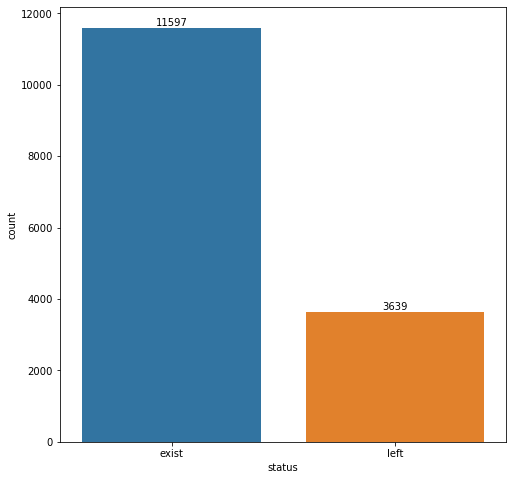

In [6]:
plt.figure(figsize = (8, 8))
graph1 = sns.countplot(data = df, x = df.status) 
graph1.bar_label(graph1.containers[0])

In [7]:
# count the individual values of status so we can define attrition rate.

count = df.status.value_counts().to_list() # to list creats a list from the output

# Same calculation can be done using simple loop
# count = 0
# # for row in df.status:
#     if row == 'left':
#         count0 += 1
# print(count0)

attrition_rate = round((count[1]/df.status.count())*100,2)
print(attrition_rate,'%')

23.88 %


[Text(0, 0, '4200'),
 Text(0, 0, '2755'),
 Text(0, 0, '2269'),
 Text(0, 0, '636'),
 Text(0, 0, '1250'),
 Text(0, 0, '918'),
 Text(0, 0, '781'),
 Text(0, 0, '751'),
 Text(0, 0, '872'),
 Text(0, 0, '804')]

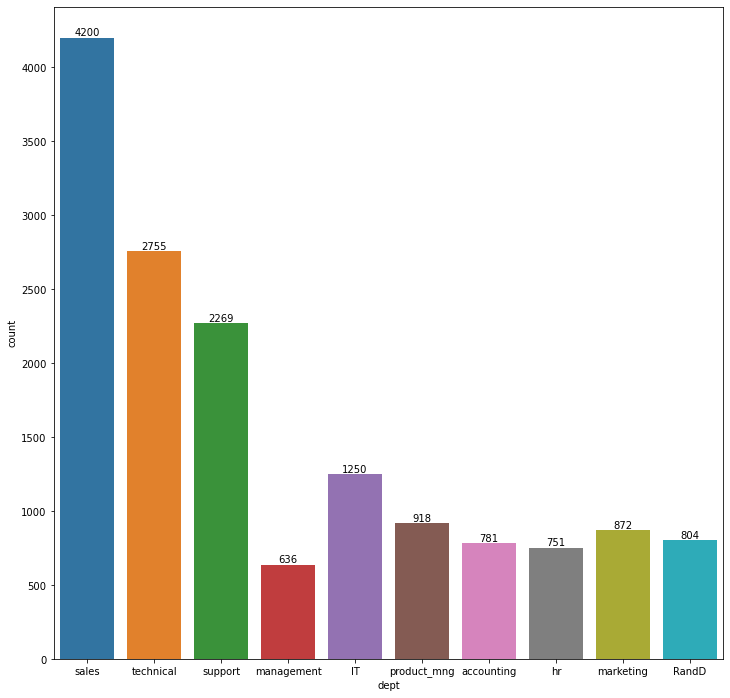

In [8]:
# Size of dept: dept staff count
plt.figure(figsize = (12, 12))
graph2 = sns.countplot(data = df, x = df.dept)
graph2.bar_label(graph2.containers[0])

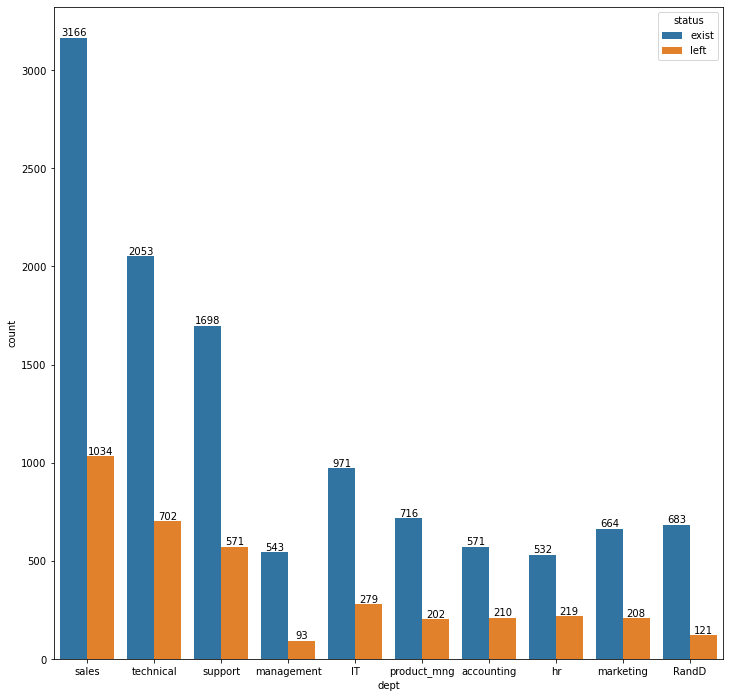

In [9]:
# Attrition based on Department
plt.figure(figsize = (12, 12))
graph3 = sns.countplot(data = df, x = df.dept, hue = df.status)
for cont in graph3.containers:
    graph3.bar_label(cont)
    
#attrition from Sales dept is maximun but we need to keep in mind that sales also has more employees.

[Text(0, 0, '61.3917'),
 Text(0, 0, '60.7866'),
 Text(0, 0, '61.7695'),
 Text(0, 0, '62.0739'),
 Text(0, 0, '61.8688'),
 Text(0, 0, '62.0479'),
 Text(0, 0, '58.1741'),
 Text(0, 0, '59.9987'),
 Text(0, 0, '61.9346'),
 Text(0, 0, '61.9192')]

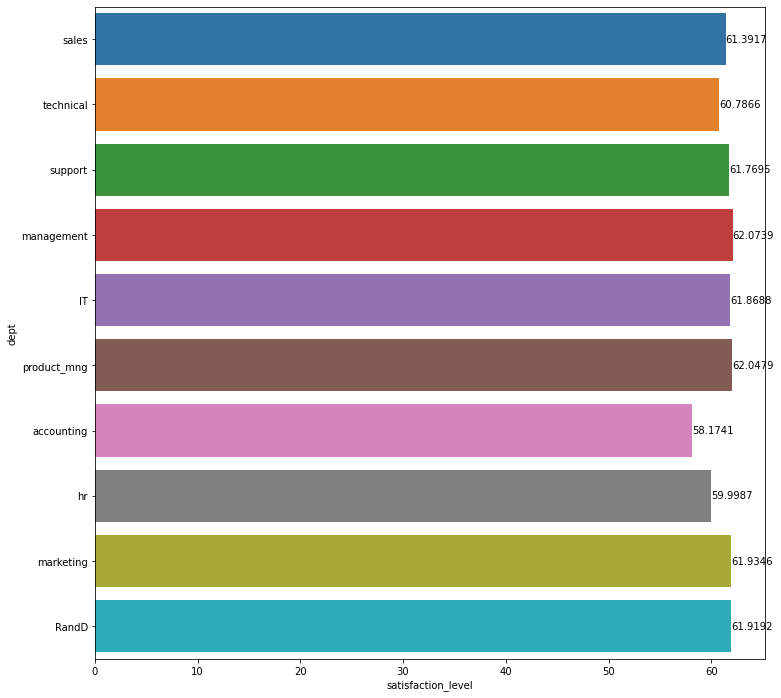

In [10]:
#checking the satisfaction level by dept
plt.figure(figsize = (12,12))
graph4 = sns.barplot(x = df.satisfaction_level*100, y = df.dept, ci = 0)
graph4.bar_label(graph4.containers[0])

# we see that satisfaction level for all the dept is almosts equal.

[Text(0, 0, '200.879'),
 Text(0, 0, '202.522'),
 Text(0, 0, '200.502'),
 Text(0, 0, '201.47'),
 Text(0, 0, '202.112'),
 Text(0, 0, '199.671'),
 Text(0, 0, '201.101'),
 Text(0, 0, '198.692'),
 Text(0, 0, '199.056'),
 Text(0, 0, '200.527')]

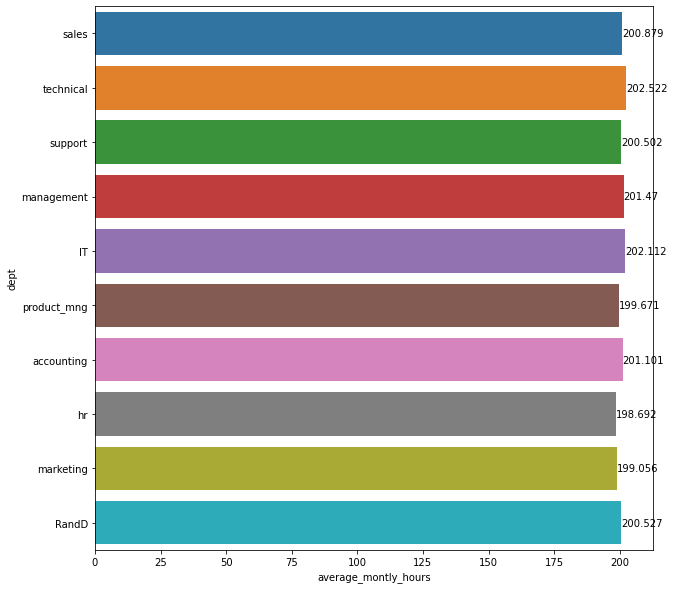

In [11]:
# seeing avg working hours by dept
plt.figure(figsize = (10,10))
graph5 = sns.barplot(x= df.average_montly_hours, y= df.dept, ci =0)
graph5.bar_label(graph5.containers[0])

# we see that working hours for all the dept is almosts equal.

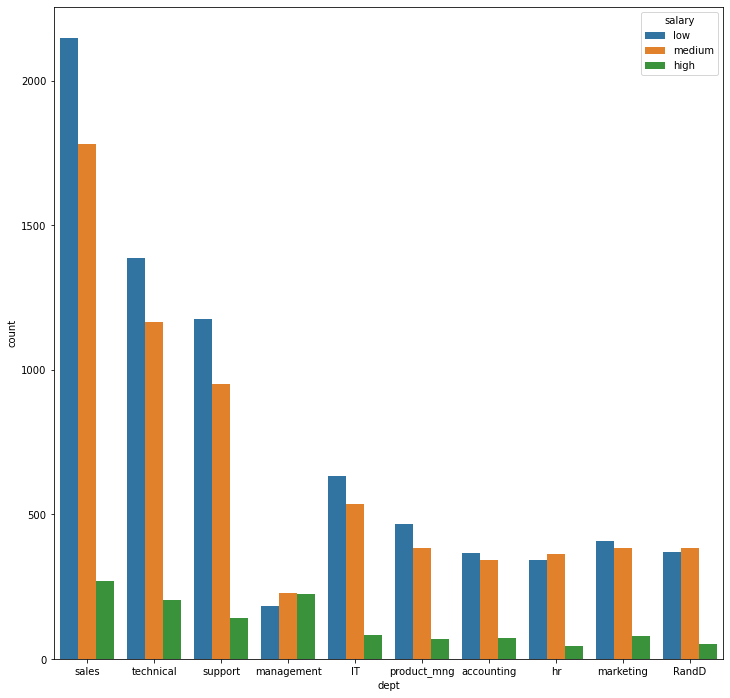

In [12]:
#salary vs dept
plt.figure(figsize = (12,12))
graph6 = sns.countplot(data = df, x = df.dept, hue = df.salary, orient = 'h')
# for cont in graph6.containers:
#     graph6.bar_label(cont)
# almost all the dept have have maximum number of low salary followed by medium and then high.
# only management dept have less low salry and almost equal medium and high salary candidates

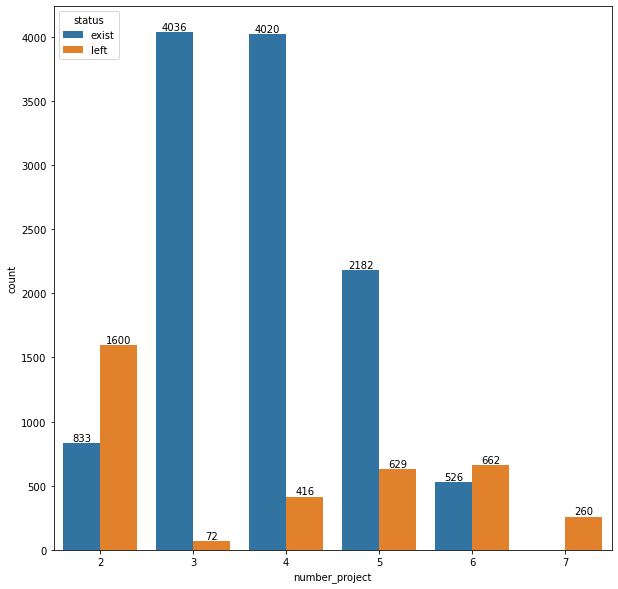

In [13]:
# it is really important to understand the amount of work each dept was expecting from employee.
plt.figure(figsize = (10,10))
graph7 = sns.countplot(data = df, x = df.number_project, hue = df.status)
for con in graph7.containers:
    graph7.bar_label(con)
# it is clearly observable from the visual that people who are overworked ( i.e with 6,7 projects) and people who are underworked 
# (i.e with 1, 2 projects) have a tendency to leave.

Text(0.5, 0, 'average monthly hours')

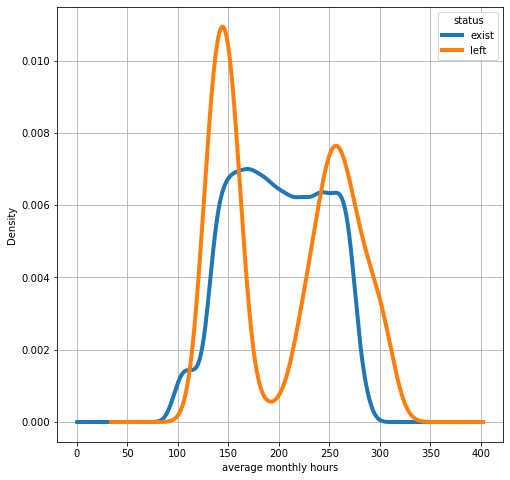

In [14]:
# density plot for status vs average monthly hours
data_wide = pd.pivot_table(data = df, index = 'Emp ID', columns = 'status', values = 'average_montly_hours')
data_wide.plot.kde(figsize = (8,8),
                  linewidth = 4,
                  grid = True)
plt.xlabel('average monthly hours')
# we can derive from the density plot people who left were overworked or underworked while there is steady
# distribution for peole who are current employees

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

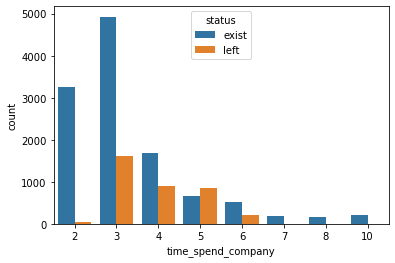

In [15]:
sns.countplot(data = df, x = df.time_spend_company, hue = 'status')
# it is observable from the visula that people between 3-6 years are most likely to leave

Moving to the machine learning part to classify the employees based on the feature

In [16]:
# encoding categorical values using label encoder
label_encoder = LabelEncoder()

df.dept = label_encoder.fit_transform(df.dept)
df.salary = label_encoder.fit_transform(df.salary)
df.status = label_encoder.fit_transform(df.status)

In [17]:
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
count,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000
mean,7473.337950,0.612710,0.715964,3.802638,200.953662,3.495865,0.145117,0.020937,5.866238,1.346416,0.238842
std,4356.005233,0.248765,0.171141,1.232679,49.923316,1.455764,0.352230,0.143179,2.870917,0.623972,0.426390
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3640.750000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,7449.500000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,7.000000,1.000000,0.000000
75%,11258.250000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,8.000000,2.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000,1.000000


In [18]:
df.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'status'],
      dtype='object')

In [19]:
# Extracting useful columns
x = df.drop(['Emp ID', 'status'], axis = 1) #data
y = df['status'] #target

In [20]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=50)

In [21]:
#import all necessary classification model for training
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [22]:
#append all the models
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))

In [23]:
models

[('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto')),
 ('RF', RandomForestClassifier())]

In [24]:
results = []
names = []
for name, model in models:
    k_fold = StratifiedKFold(n_splits = 10, random_state = 2, shuffle = True )
    cross_val_result = cross_val_score(model, x_train, y_train, cv = k_fold, scoring = 'accuracy')
    results.append(cross_val_result)
    names.append(name)
    print('%s: %f, (%f)' % (name, cross_val_result.mean(), round(cross_val_result.std(),3)))

LDA: 0.759519, (0.011000)
KNN: 0.933540, (0.006000)
LR: 0.762718, (0.011000)
CART: 0.979570, (0.003000)
NB: 0.798655, (0.012000)
SVM: 0.949457, (0.007000)
RF: 0.990810, (0.002000)


In [25]:
#trainig the model
model = RandomForestClassifier(n_estimators = 100) 
model.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
#making predictions
prediction = model.predict(x_test)

In [27]:
#confusion matrix
confusion_matrix(prediction, y_test)

array([[2317,   16],
       [   2,  713]], dtype=int64)

In [28]:
#accuracy
print(accuracy_score(y_test, prediction))

0.9940944881889764


In [29]:
#Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2319
           1       1.00      0.98      0.99       729

    accuracy                           0.99      3048
   macro avg       1.00      0.99      0.99      3048
weighted avg       0.99      0.99      0.99      3048

